# Simple model

## PyTorch

In [2]:
import torch
import torch.nn as nn
import numpy as np

from matplotlib import pyplot as plt

In [3]:
#y = 2*x
train_x = torch.FloatTensor([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
train_y = torch.FloatTensor([-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0])

In [4]:
class SimpleNet(nn.Module):
  def __init__(self):
    super(SimpleNet, self).__init__()
    self.ff = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    x = x.unsqueeze(0)
    y = self.ff(x)
    return y

In [5]:
def train(model, optimizer, criterion):
  epoch_loss = 0
  for x,y in zip(train_x,train_y):
    #wipe previous gradients
    optimizer.zero_grad()
    
    #get predictions
    pred = model(x)
    
    #calculate loss
    loss = criterion(y,pred)
    loss.backward()

    #update weights
    optimizer.step()

    epoch_loss += loss

  return epoch_loss

def eval(model):
  model.eval()

  with torch.no_grad():
    pred = model(train_x.view(-1,1))
    plt.figure()
    plt.plot(train_x, pred.view(1,-1).squeeze())
    plt.plot(train_x, train_y)
    plt.show()


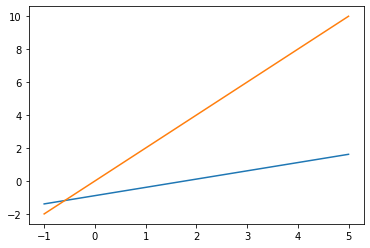

epoch:  0 loss:  tensor(197.7375, grad_fn=<AddBackward0>)


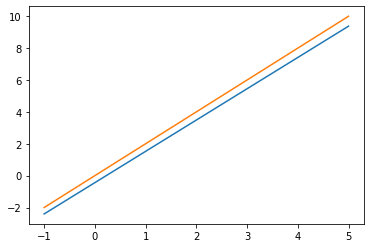

epoch:  20 loss:  tensor(2.1023, grad_fn=<AddBackward0>)


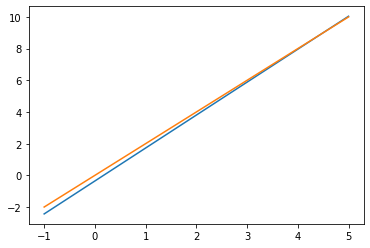

epoch:  40 loss:  tensor(0.4520, grad_fn=<AddBackward0>)


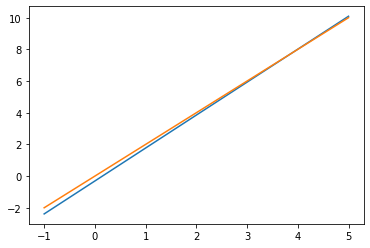

epoch:  60 loss:  tensor(0.3376, grad_fn=<AddBackward0>)


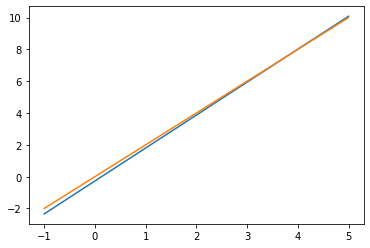

epoch:  80 loss:  tensor(0.2593, grad_fn=<AddBackward0>)


In [6]:
model_pt = SimpleNet()

epochs = 100
optimizer = torch.optim.ASGD(model_pt.parameters(), lr=0.001)
criterion = nn.MSELoss()
history=[]

for i in range(epochs):
  loss = train(model_pt, optimizer, criterion)
  if i%20 == 0:
    eval(model_pt)
    print("epoch: ", i, "loss: ", loss)
  history.append(loss)

In [7]:
def predict(model, num):
  model.eval()
  num = torch.FloatTensor([num])
  with torch.no_grad():
    return model(num)[0][0]

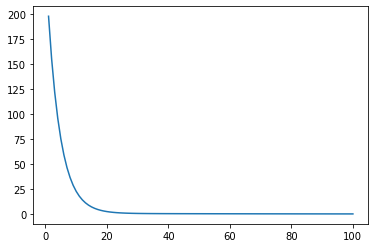

In [8]:
plt.plot(range(1,101), history)

In [9]:
predict(model_pt,10)

tensor(20.3867)

## TensorFlow

In [13]:
import tensorflow as tf

In [14]:
#y = 2*x
train_x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
train_y = np.array([-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0])

In [15]:
model_tf = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model_tf.compile(optimizer='sgd', loss='mean_squared_error')

history = model_tf.fit(train_x, train_y, epochs=100, verbose=0)

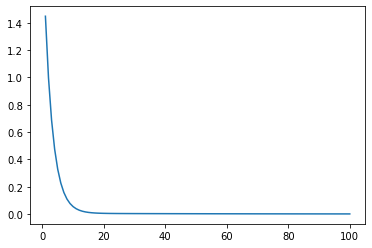

In [16]:
plt.plot(range(1,101), history.history["loss"])

In [17]:
model_tf.predict([10])

array([[19.931896]], dtype=float32)